.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

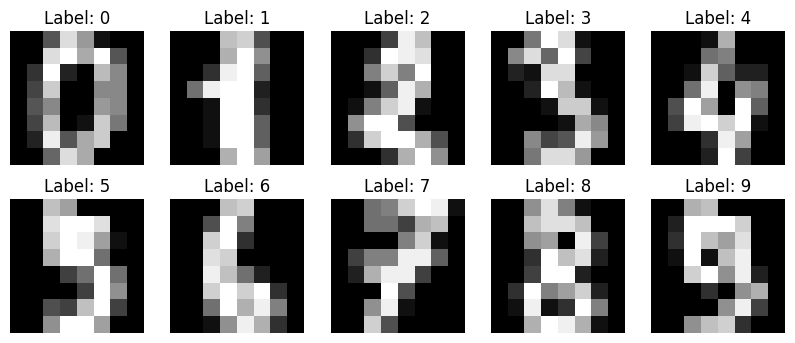

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Display some information about the dataset
print(digits.DESCR)

# Access the data and target
X = digits.data  # Features
y = digits.target  # Target labels

# Visualize a few examples from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')

plt.show()


In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the value of 'n_neighbors'

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.93      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [17]:
# Create a KNN classifier
knn_classifier1 = KNeighborsClassifier(n_neighbors=7)  # You can adjust the value of 'n_neighbors'

# Fit the classifier on the training data
knn_classifier1.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier1.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9888888888888889
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



knn value improves if we go from 3 to 7. If we have knn value greater than 7, the score decreases.

In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for n_neighbors
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]}  # You can adjust the values as needed

# Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid)
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameter from the grid search
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Create a KNN classifier with the best n_neighbors value
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Fit the classifier on the training data
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_knn_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Best n_neighbors:", best_n_neighbors)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Best n_neighbors: 3
Accuracy: 0.9833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.93      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

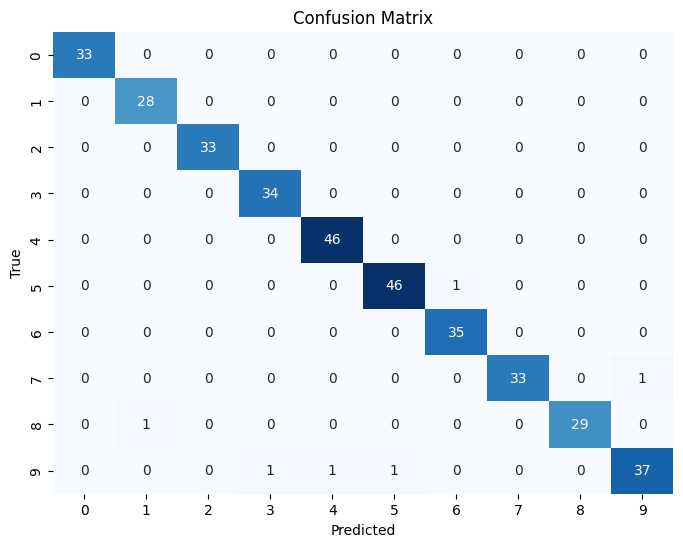

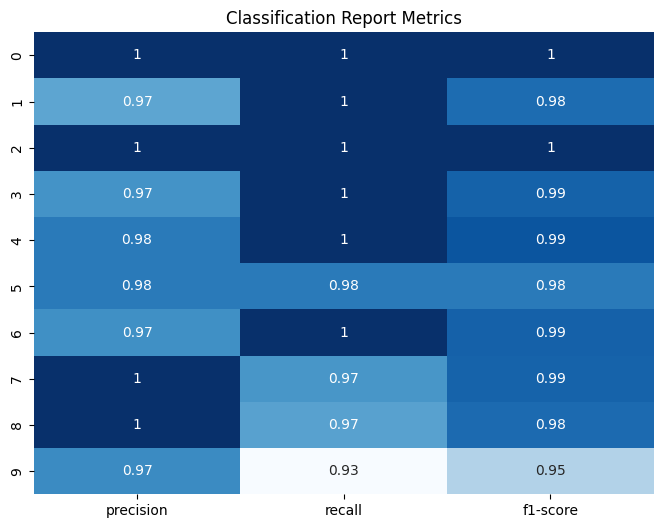

In [27]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Classification Report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)], output_dict=True)
df_class_report = pd.DataFrame(class_report).T
plt.figure(figsize=(8, 6))
sns.heatmap(df_class_report.iloc[:-3, :-1], annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report Metrics')
plt.show()